In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv('dataset.csv')

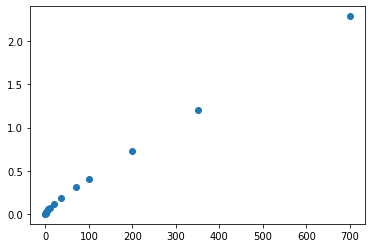

In [16]:
plt.scatter(df.ShearRate, df.Stress)

In [26]:
reg = LinearRegression()
reg.fit(df[['ShearRate']], df.Stress)

LinearRegression()

In [29]:
print(reg.coef_, reg.intercept_, sep='\n')

[0.00326923]
0.036495896472117206


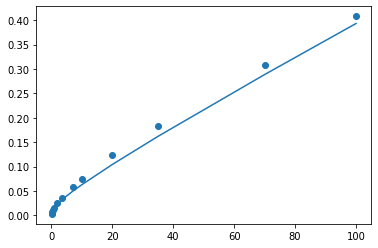

In [77]:
reg_casson = LinearRegression()
reg_casson.fit(df[['ShearRate']] ** 0.5, df.Stress ** 0.5)
casson_viscosity = reg_casson.coef_[0] ** 2
casson_yield_stress = reg_casson.intercept_ ** 2

def casson_model(shear_rate):
    cys = casson_yield_stress
    cv = casson_viscosity
    return cys + cv * shear_rate + 2 * np.math.pow(cys * cv * shear_rate, 0.5)

casson_func = np.vectorize(casson_model)
casson_stress = casson_func(df.ShearRate)

with plt.style.context('fast'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13])
    plt.plot(df.ShearRate[:13], casson_stress[:13])
    plt.show()

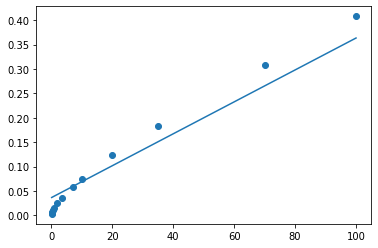

In [76]:
reg_bingham = LinearRegression()
reg_bingham.fit(df[['ShearRate']], df.Stress)
bingham_viscosity = reg_bingham.coef_[0]
bingham_yield_stress = reg_bingham.intercept_

def bingham_model(shear_rate):
    return bingham_yield_stress + bingham_viscosity * shear_rate
bingham_func = np.vectorize(bingham_model)

bingham_stress = bingham_func(df.ShearRate)
with plt.style.context('fast'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13])
    plt.plot(df.ShearRate[:13], bingham_stress[:13])
    plt.show()

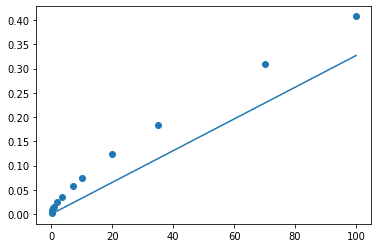

In [75]:
reg_newtonian = LinearRegression()
reg_newtonian.fit(df[['ShearRate']], df.Stress)
newtonian_viscosity = reg_newtonian.coef_[0] / 2

def newtonian_model(shear_rate):
    return 2 * newtonian_viscosity * shear_rate
newtonian_func = np.vectorize(newtonian_model)

newtonian_stress = newtonian_func(df.ShearRate)
with plt.style.context('fast'):
    plt.scatter(df.ShearRate[:13], df.Stress[:13])
    plt.plot(df.ShearRate[:13], newtonian_stress[:13])
    plt.show()

In [110]:
df2 = pd.read_csv('dataset_2.csv')
df2 = df2.rename(columns={
    'ShearRate': '$\gamma$ ($s^{-1})$', 
    'Stress': '$\sigma (Pa)$',
    'Viscosity': '$\mu (Pa)$'
})

df2.style.hide_index()

$\gamma$ ($s^{-1})$,$\sigma (Pa)$,$\mu (Pa)$
0.100000,0.002950,0.029500
0.200000,0.006410,0.032050
0.350000,0.009847,0.028134
0.700000,0.015470,0.022100
1.000000,0.020300,0.020300
2.000000,0.031100,0.015550
3.500000,0.044700,0.012771
7.000000,0.072000,0.010286
10.000000,0.091800,0.009180
20.000000,0.149000,0.007450
